<a href="https://colab.research.google.com/github/samrudhi93/Machine-Translation-techniques/blob/main/English_to_hindi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)
root_path = 'gdrive/MyDrive/Colab_Notebooks/'

Mounted at /content/gdrive


In [9]:
!wget /content/drive/MyDrive/Colab_Notebooks/English.txt

/content/drive/MyDrive/Colab_Notebooks/English.txt: Scheme missing.


In [10]:
!wget /content/drive/MyDrive/Colab_Notebooks/Hindi.txt

/content/drive/MyDrive/Colab_Notebooks/Hindi.txt: Scheme missing.


In [15]:
import re
import random
data_path = "/content/gdrive/MyDrive/Colab_Notebooks/English.txt"
data_path2 = "/content/gdrive/MyDrive/Colab_Notebooks/Hindi.txt"
# Defining lines as a list of each line
with open(data_path, 'r', encoding='utf-8') as f:
  english_lines = f.read().strip().split('\n')
with open(data_path2, 'r', encoding='utf-8') as f:
  hindi_lines = f.read().strip().split('\n')

 

In [16]:
english_lines

['new jersey is sometimes quiet during autumn , and it is snowy in april .',
 'the united states is usually chilly during july , and it is usually freezing in november .',
 'california is usually quiet during march , and it is usually hot in june .',
 'the united states is sometimes mild during june , and it is cold in september .',
 'your least liked fruit is the grape , but my least liked is the apple .',
 'his favorite fruit is the orange , but my favorite is the grape .',
 'paris is relaxing during december , but it is usually chilly in july .',
 'new jersey is busy during spring , and it is never hot in march .',
 'our least liked fruit is the lemon , but my least liked is the grape .',
 'the united states is sometimes busy during january , and it is sometimes warm in november .',
 'the lime is her least liked fruit , but the banana is my least liked .',
 'he saw a old yellow truck .',
 'india is rainy during june , and it is sometimes warm in november .',
 'that cat was my most l

In [17]:
hindi_lines

['नई जर्सी कभी-कभी शरद ऋतु के दौरान शांत होती है, और यह अप्रैल में बर्फीली होती है।',
 'संयुक्त राज्य आमतौर पर जुलाई के दौरान मिर्च होता है, और यह आमतौर पर नवम्बर में जम जाता है।',
 'कैलिफ़ोर्निया आमतौर पर मार्च के दौरान शांत होता है, और आमतौर पर जून में गर्म होता है।',
 'संयुक्त राज्य कभी-कभी जून के दौरान हल्के होते हैं, और यह सितंबर में ठंडा होता है।',
 'आपका सबसे कम पसंद किया जाने वाला फल अंगूर है, लेकिन मेरा सबसे कम पसंद किया जाने वाला सेब है।',
 'उसका पसंदीदा फल नारंगी है, लेकिन मेरा पसंदीदा अंगूर है।',
 'पेरिस के दौरान पेरिस आराम कर रहा है, लेकिन यह आमतौर पर जूली में मिर्च है।',
 'नई जर्सी वसंत के दौरान व्यस्त है, और यह मार्च में कभी गर्म नहीं होती है।',
 'हमारा सबसे कम पसंद किया जाने वाला फल नींबू है, लेकिन मेरी सबसे कम पसंद अंगूर है।',
 'एकजुट राज्य कभी-कभी जीवन के दौरान व्यस्त होते हैं, और यह कभी-कभी नवम्बर में गर्म होता है।',
 'चूना उसका सबसे कम पसंद किया जाने वाला फल है, लेकिन केला मुझे सबसे कम पसंद है।',
 'उसने एक पुराना पीला ट्रक देखा।',
 'जून जून के दौरान बरसात होती है, औ

In [19]:
english_lines = [" ".join(re.findall(r"[A-Za-z0-9]+",line)) for line in english_lines]
hindi_lines = [re.sub(r"%s|\(|\)|<|>|%|[a-z]|[A-Z]|_",'',line) for line in hindi_lines]

# Grouping lines by response pair
pairs = list(zip(english_lines, hindi_lines))
random.shuffle(pairs)
print(len(pairs))

10000


In [20]:
pairs[66]

('china is usually snowy during april and it is sometimes pleasant in march',
 'अप्रैल के दौरान चीन आमतौर पर बर्फीला होता है, और यह कभी-कभी मार्च में सुखद होता है।')

In [28]:
import numpy as np
input_docs = []
target_docs = []
input_tokens = set()
target_tokens = set()

for line in pairs:
  input_doc, target_doc = line[0], line[1]
  # Appending each input sentence to input_docs
  input_docs.append(input_doc)
  # Splitting words from punctuation  
  target_doc = " ".join(re.findall(r"[\w']+|[^\s\w]", target_doc))
  # Redefine target_doc below and append it to target_docs
  target_doc = '<START> ' + target_doc + ' <END>'
  target_docs.append(target_doc)
    # Now we split up each sentence into words and add each unique word to our vocabulary set
  for token in re.findall(r"[\w']+|[^\s\w]", input_doc):
    if token not in input_tokens:
      input_tokens.add(token)
  for token in target_doc.split(" "):
    if token not in target_tokens:
      target_tokens.add(token)
input_tokens = sorted(list(input_tokens))
target_tokens = sorted(list(target_tokens))
num_encoder_tokens = len(input_tokens)
num_decoder_tokens = len(target_tokens)

max_encoder_seq_length = max([len(re.findall(r"[\w']+|[^\s\w]", input_doc)) for input_doc in input_docs])
max_decoder_seq_length = max([len(re.findall(r"[\w']+|[^\s\w]", target_doc)) for target_doc in target_docs])

print("Number of samples:", len(input_docs))
print("Number of unique input tokens:", num_encoder_tokens)
print("Number of unique output tokens:", num_decoder_tokens)
print("Max sequence length for inputs:", max_encoder_seq_length)
print("Max sequence length for outputs:", max_decoder_seq_length)

Number of samples: 10000
Number of unique input tokens: 200
Number of unique output tokens: 238
Max sequence length for inputs: 15
Max sequence length for outputs: 84


In [ ]:
target_docs

In [29]:
input_features_dict = dict(
    [(token, i) for i, token in enumerate(input_tokens)])
target_features_dict = dict(
    [(token, i) for i, token in enumerate(target_tokens)])

reverse_input_features_dict = dict(
    (i, token) for token, i in input_features_dict.items())
reverse_target_features_dict = dict(
    (i, token) for token, i in target_features_dict.items())


In [30]:
encoder_input_data = np.zeros(
    (len(input_docs), max_encoder_seq_length, num_encoder_tokens),
    dtype='float32')
decoder_input_data = np.zeros(
    (len(input_docs), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')
decoder_target_data = np.zeros(
    (len(input_docs), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')


In [31]:
for line, (input_doc, target_doc) in enumerate(zip(input_docs, target_docs)):
    for timestep, token in enumerate(re.findall(r"[\w']+|[^\s\w]", input_doc)):
        #Assign 1. for the current line, timestep, & word in encoder_input_data
        encoder_input_data[line, timestep, input_features_dict[token]] = 1.
    
    for timestep, token in enumerate(target_doc.split()):
        decoder_input_data[line, timestep, target_features_dict[token]] = 1.
        if timestep > 0:
            decoder_target_data[line, timestep - 1, target_features_dict[token]] = 1.

In [32]:
print(target_docs[55],input_docs[55],num_decoder_tokens,num_encoder_tokens)

<START> वह स ् ट ् र ॉ ब े र ी , स ं तर े और क े ल े क ो न ा पस ं द करत ी ह ै । <END> she dislikes strawberries oranges and bananas 238 200


In [35]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Input, Dense

#Dimensionality
dimensionality = 256
#The batch size and number of epochs
batch_size = 256
epochs = 100
#Encoder
encoder_inputs = Input(shape=(None, num_encoder_tokens))
encoder_lstm = LSTM(dimensionality, return_state=True)
encoder_outputs, state_hidden, state_cell = encoder_lstm(encoder_inputs)
encoder_states = [state_hidden, state_cell]
#Decoder
decoder_inputs = Input(shape=(None, num_decoder_tokens))
decoder_lstm = LSTM(dimensionality, return_sequences=True, return_state=True)
decoder_outputs, decoder_state_hidden, decoder_state_cell = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# #Model
training_model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
# #Compiling
training_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Training
history = training_model.fit([encoder_input_data, decoder_input_data], decoder_target_data, batch_size = batch_size, epochs = epochs, validation_split = 0.2)
#training_model.save('training_model.h5')


Epoch 1/100
32/32 [==============================] - 44s 1s/step - loss: 2.4116 - accuracy: 0.0437 - val_loss: 2.1412 - val_accuracy: 0.0451
Epoch 2/100
32/32 [==============================] - 40s 1s/step - loss: 2.1402 - accuracy: 0.0445 - val_loss: 2.1350 - val_accuracy: 0.0466
Epoch 3/100
32/32 [==============================] - 40s 1s/step - loss: 2.1316 - accuracy: 0.0455 - val_loss: 2.1210 - val_accuracy: 0.0474
Epoch 4/100
32/32 [==============================] - 40s 1s/step - loss: 2.1167 - accuracy: 0.0491 - val_loss: 2.1035 - val_accuracy: 0.0485
Epoch 5/100
32/32 [==============================] - 40s 1s/step - loss: 2.1033 - accuracy: 0.0500 - val_loss: 2.0877 - val_accuracy: 0.0520
Epoch 6/100
32/32 [==============================] - 40s 1s/step - loss: 2.0785 - accuracy: 0.0528 - val_loss: 2.0540 - val_accuracy: 0.0600
Epoch 7/100
32/32 [==============================] - 40s 1s/step - loss: 2.0417 - accuracy: 0.0583 - val_loss: 2.0282 - val_accuracy: 0.0563
Epoch 8/100
3

In [36]:
training_model.save('training_model.h5')

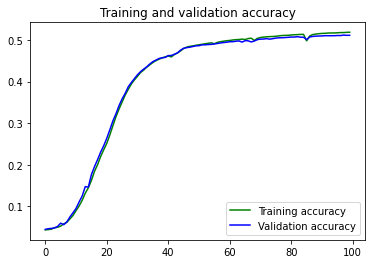

<Figure size 432x288 with 0 Axes>

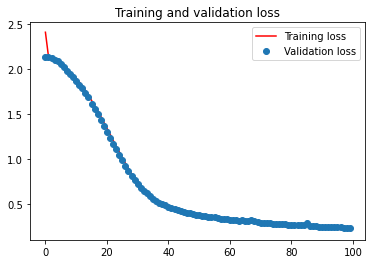

<Figure size 432x288 with 0 Axes>

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.savefig('wordA.png')
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'o', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.savefig('wordL.png')
plt.figure()
plt.show()

In [39]:
from tensorflow.keras.models import load_model

training_model = load_model('/content/training_model.h5')
encoder_inputs = training_model.input[0]
encoder_outputs, state_h_enc, state_c_enc = training_model.layers[2].output
encoder_states = [state_h_enc, state_c_enc]
encoder_model = Model(encoder_inputs, encoder_states)

In [40]:
latent_dim = 256
decoder_state_input_hidden = Input(shape=(latent_dim,))
decoder_state_input_cell = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_hidden, decoder_state_input_cell]
decoder_outputs, state_hidden, state_cell = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_hidden, state_cell]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)

In [41]:
def decode_response(test_input):
    #Getting the output states to pass into the decoder
    states_value = encoder_model.predict(test_input)
    #Generating empty target sequence of length 1
    target_seq = np.zeros((1, 1, num_decoder_tokens))
    #Setting the first token of target sequence with the start token
    target_seq[0, 0, target_features_dict['<START>']] = 1.
    
    #A variable to store our response word by word
    decoded_sentence = ''
    
    stop_condition = False
    while not stop_condition:
      #Predicting output tokens with probabilities and states
      output_tokens, hidden_state, cell_state = decoder_model.predict([target_seq] + states_value)
#Choosing the one with highest probability
      sampled_token_index = np.argmax(output_tokens[0, -1, :])
      sampled_token = reverse_target_features_dict[sampled_token_index]
      decoded_sentence += " " + sampled_token
#Stop if hit max length or found the stop token
      if (sampled_token == '<END>' or len(decoded_sentence) > max_decoder_seq_length):
        stop_condition = True
#Update the target sequence
      target_seq = np.zeros((1, 1, num_decoder_tokens))
      target_seq[0, 0, sampled_token_index] = 1.
      #Update states
      states_value = [hidden_state, cell_state]
    return decoded_sentence

In [42]:
class Translator:
  exit_commands = ("quit", "pause", "exit", "goodbye", "bye", "later", "stop")
  
  #Method to start the translator
  def start(self):
    user_response = input("Give in an English sentence. :) \n")
    self.translate(user_response)
  
  #Method to handle the conversation
  def translate(self, reply):
    while not self.make_exit(reply):
      reply = input(self.generate_response(reply)+"\n")

  #Method to convert user input into a matrix
  def string_to_matrix(self, user_input):
    tokens = re.findall(r"[\w']+|[^\s\w]", user_input)
    user_input_matrix = np.zeros(
      (1, max_encoder_seq_length, num_encoder_tokens),
      dtype='float32')
    for timestep, token in enumerate(tokens):
      if token in input_features_dict:
        user_input_matrix[0, timestep, input_features_dict[token]] = 1.
    return user_input_matrix
  
  #Method that will create a response using seq2seq model we built
  def generate_response(self, user_input):
    input_matrix = self.string_to_matrix(user_input)
    chatbot_response = decode_response(input_matrix)
    #Remove <START> and <END> tokens from chatbot_response
    chatbot_response = chatbot_response.replace("<START>",'')
    chatbot_response = chatbot_response.replace("<END>",'')
    return chatbot_response
    #Method to check for exit commands
  def make_exit(self, reply):
    for exit_command in self.exit_commands:
      if exit_command in reply:
        print("Ok, have a great day!")
        return True
    return False
  
translator = Translator()

In [44]:
translator.start()

Give in an English sentence. :) 
he likes banana
 उस े क े ल ा पस ं द ह ै । 
he like grape
 वह अ ं ग ू र और न ा पस ं द करत ा ह ै । 
she is driving white truck
 वह एक चमकद ा र सफ े द ट ् रक चल ा रह ी ह ै । 
exit
Ok, have a great day!
